<a href="https://colab.research.google.com/github/amoessin/amoessin.github.io/blob/main/examples/randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
# Import necessary libraries
!git clone https://github.com/brighamfrandsen/econ484.git
%cd econ484/utilities
from preamble import *
%cd ../data



fatal: destination path 'econ484' already exists and is not an empty directory.
/content/econ484/utilities
/content/econ484/data


#### Ensembles of Decision Trees
##### Random forests
###### Building random forests
###### Analyzing random forests

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2, bootstrap=True)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

This plots the random forests with all the observations on each plot

In [3]:
forest.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=794921487)

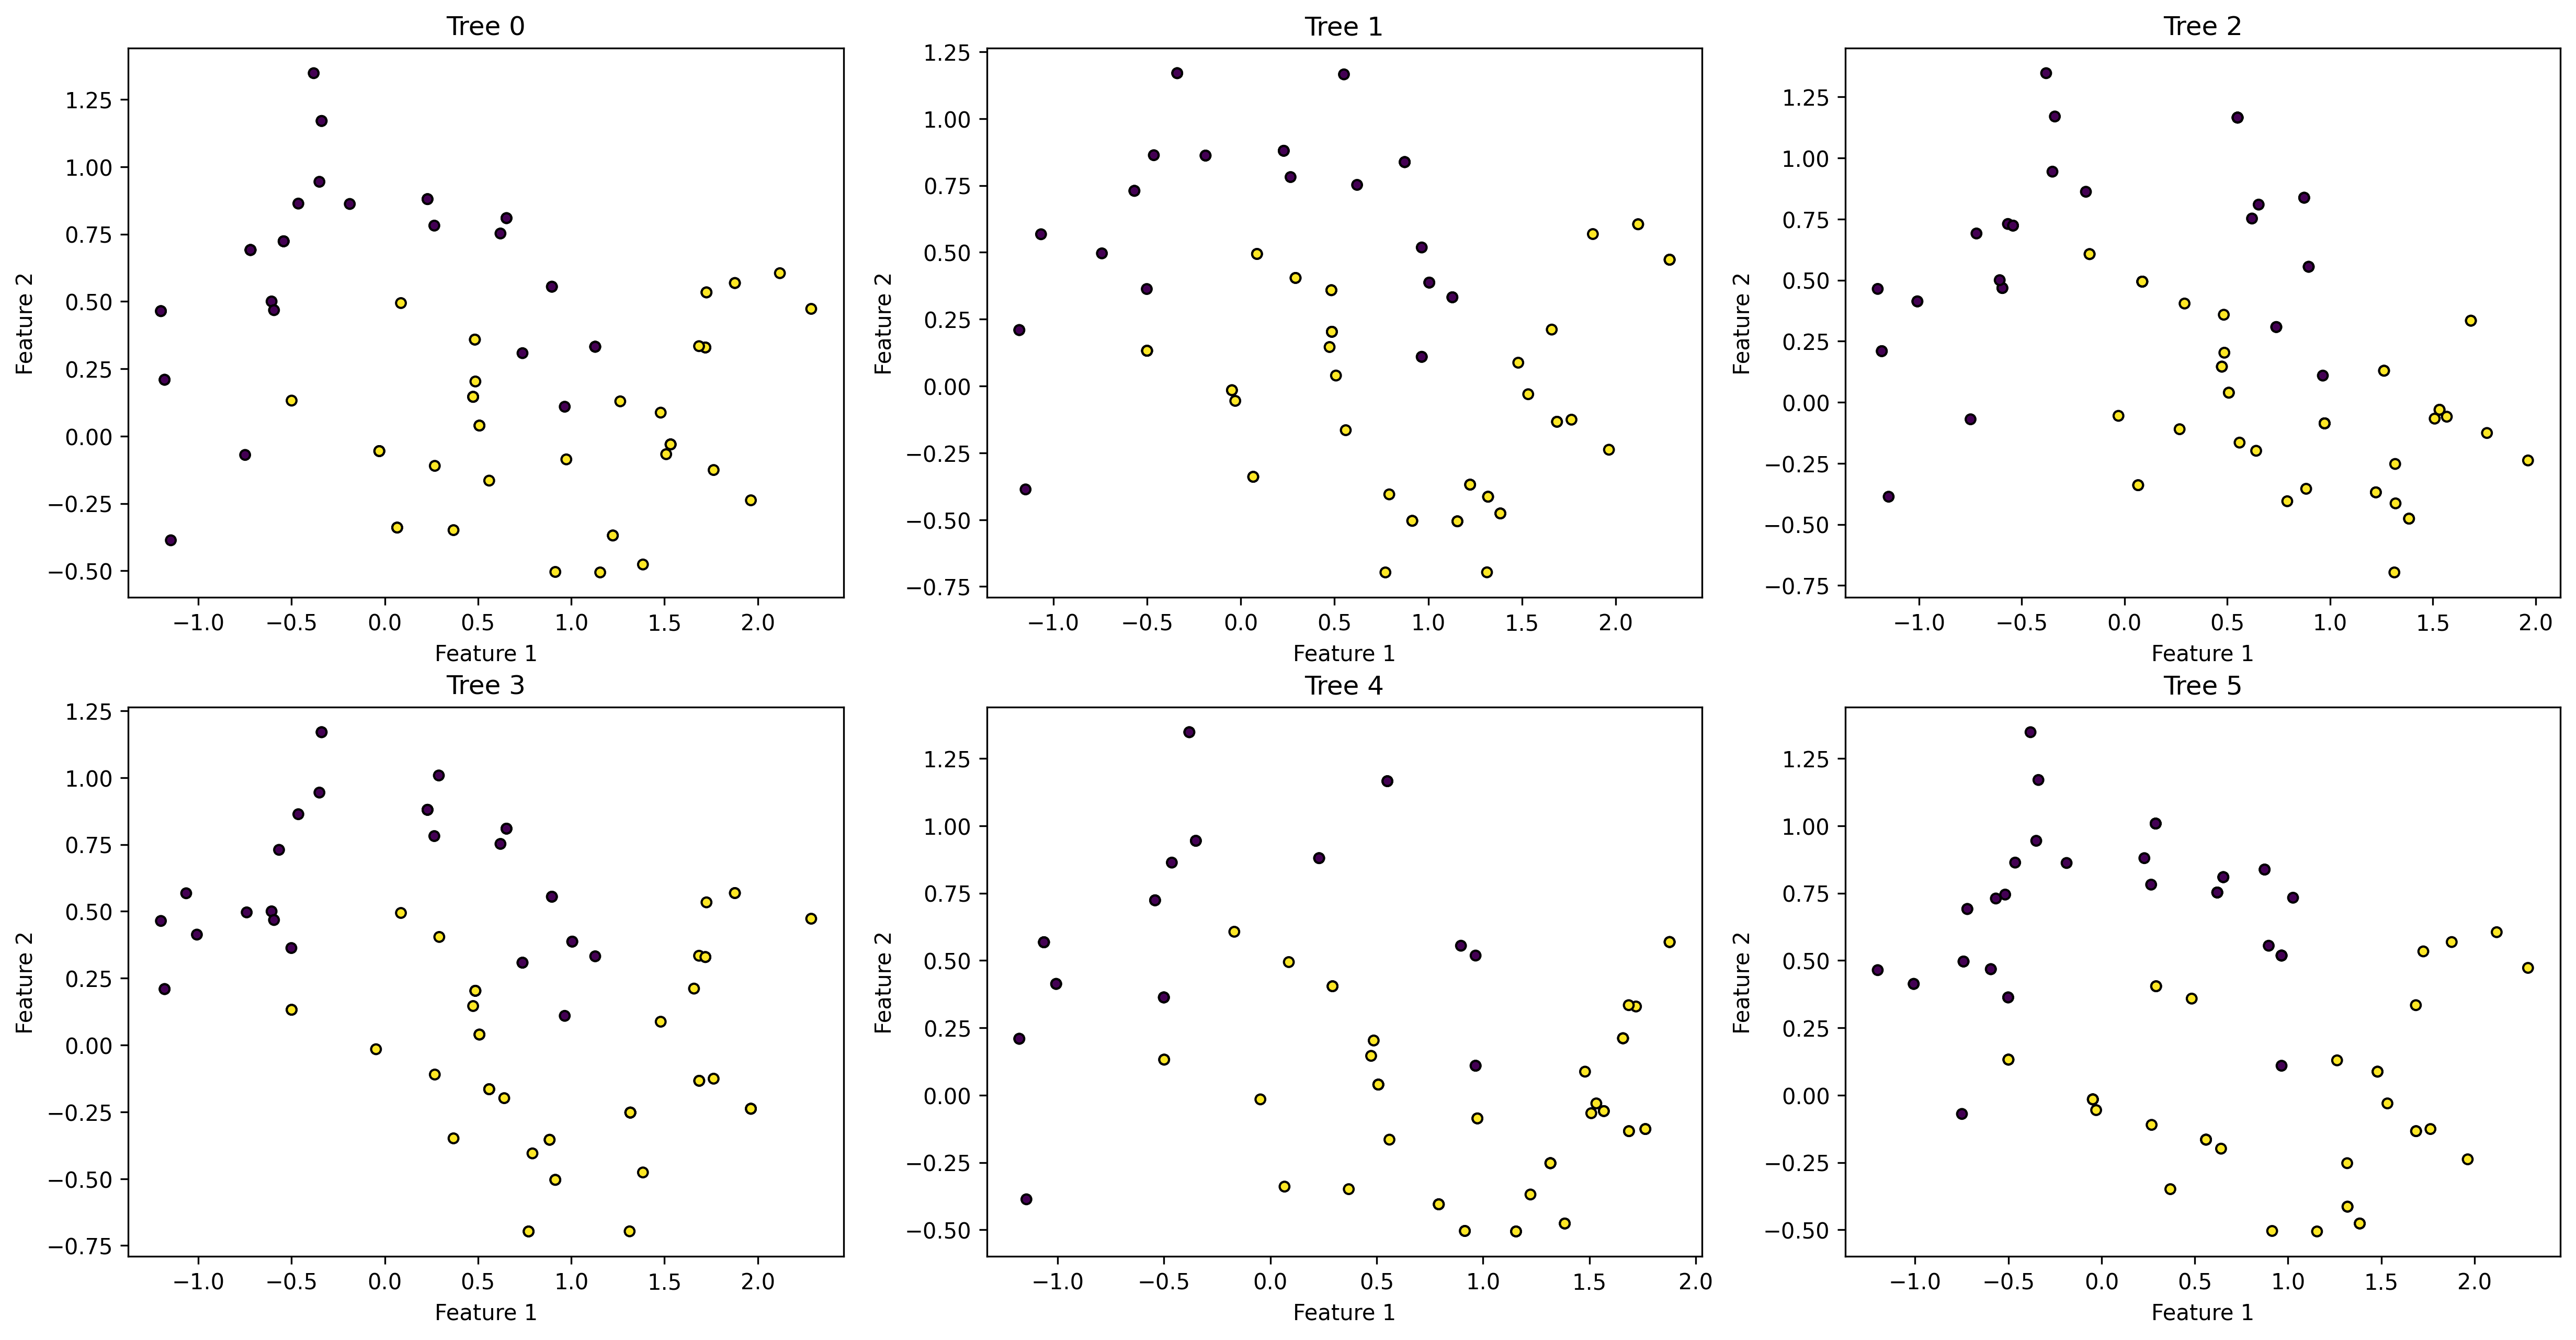

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.datasets import load_iris
from sklearn.tree import plot_tree


# Train Random Forest with BaggingClassifier
forest = BaggingClassifier(estimator=RandomForestClassifier(n_estimators=1, random_state=42),
                           n_estimators=10, random_state=42, bootstrap=True)
forest.fit(X_train, y_train)

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    # Get the indices of the samples used to train this tree
    bootstrap_indices = forest.estimators_samples_[i]
    X_bootstrap = X[bootstrap_indices]
    y_bootstrap = y[bootstrap_indices]

    # Plot only the subsample
    ax.scatter(X_bootstrap[:, 0], X_bootstrap[:, 1], c=y_bootstrap, edgecolor='k', s=20)
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')

    # Access the single decision tree within the RandomForestClassifier
    single_tree = forest.estimators_[i][0]

    # Plot the tree structure
    # plot_tree(single_tree[0], ax=ax, filled=True, rounded=True, proportion=True)


plt.show()

plt.show()

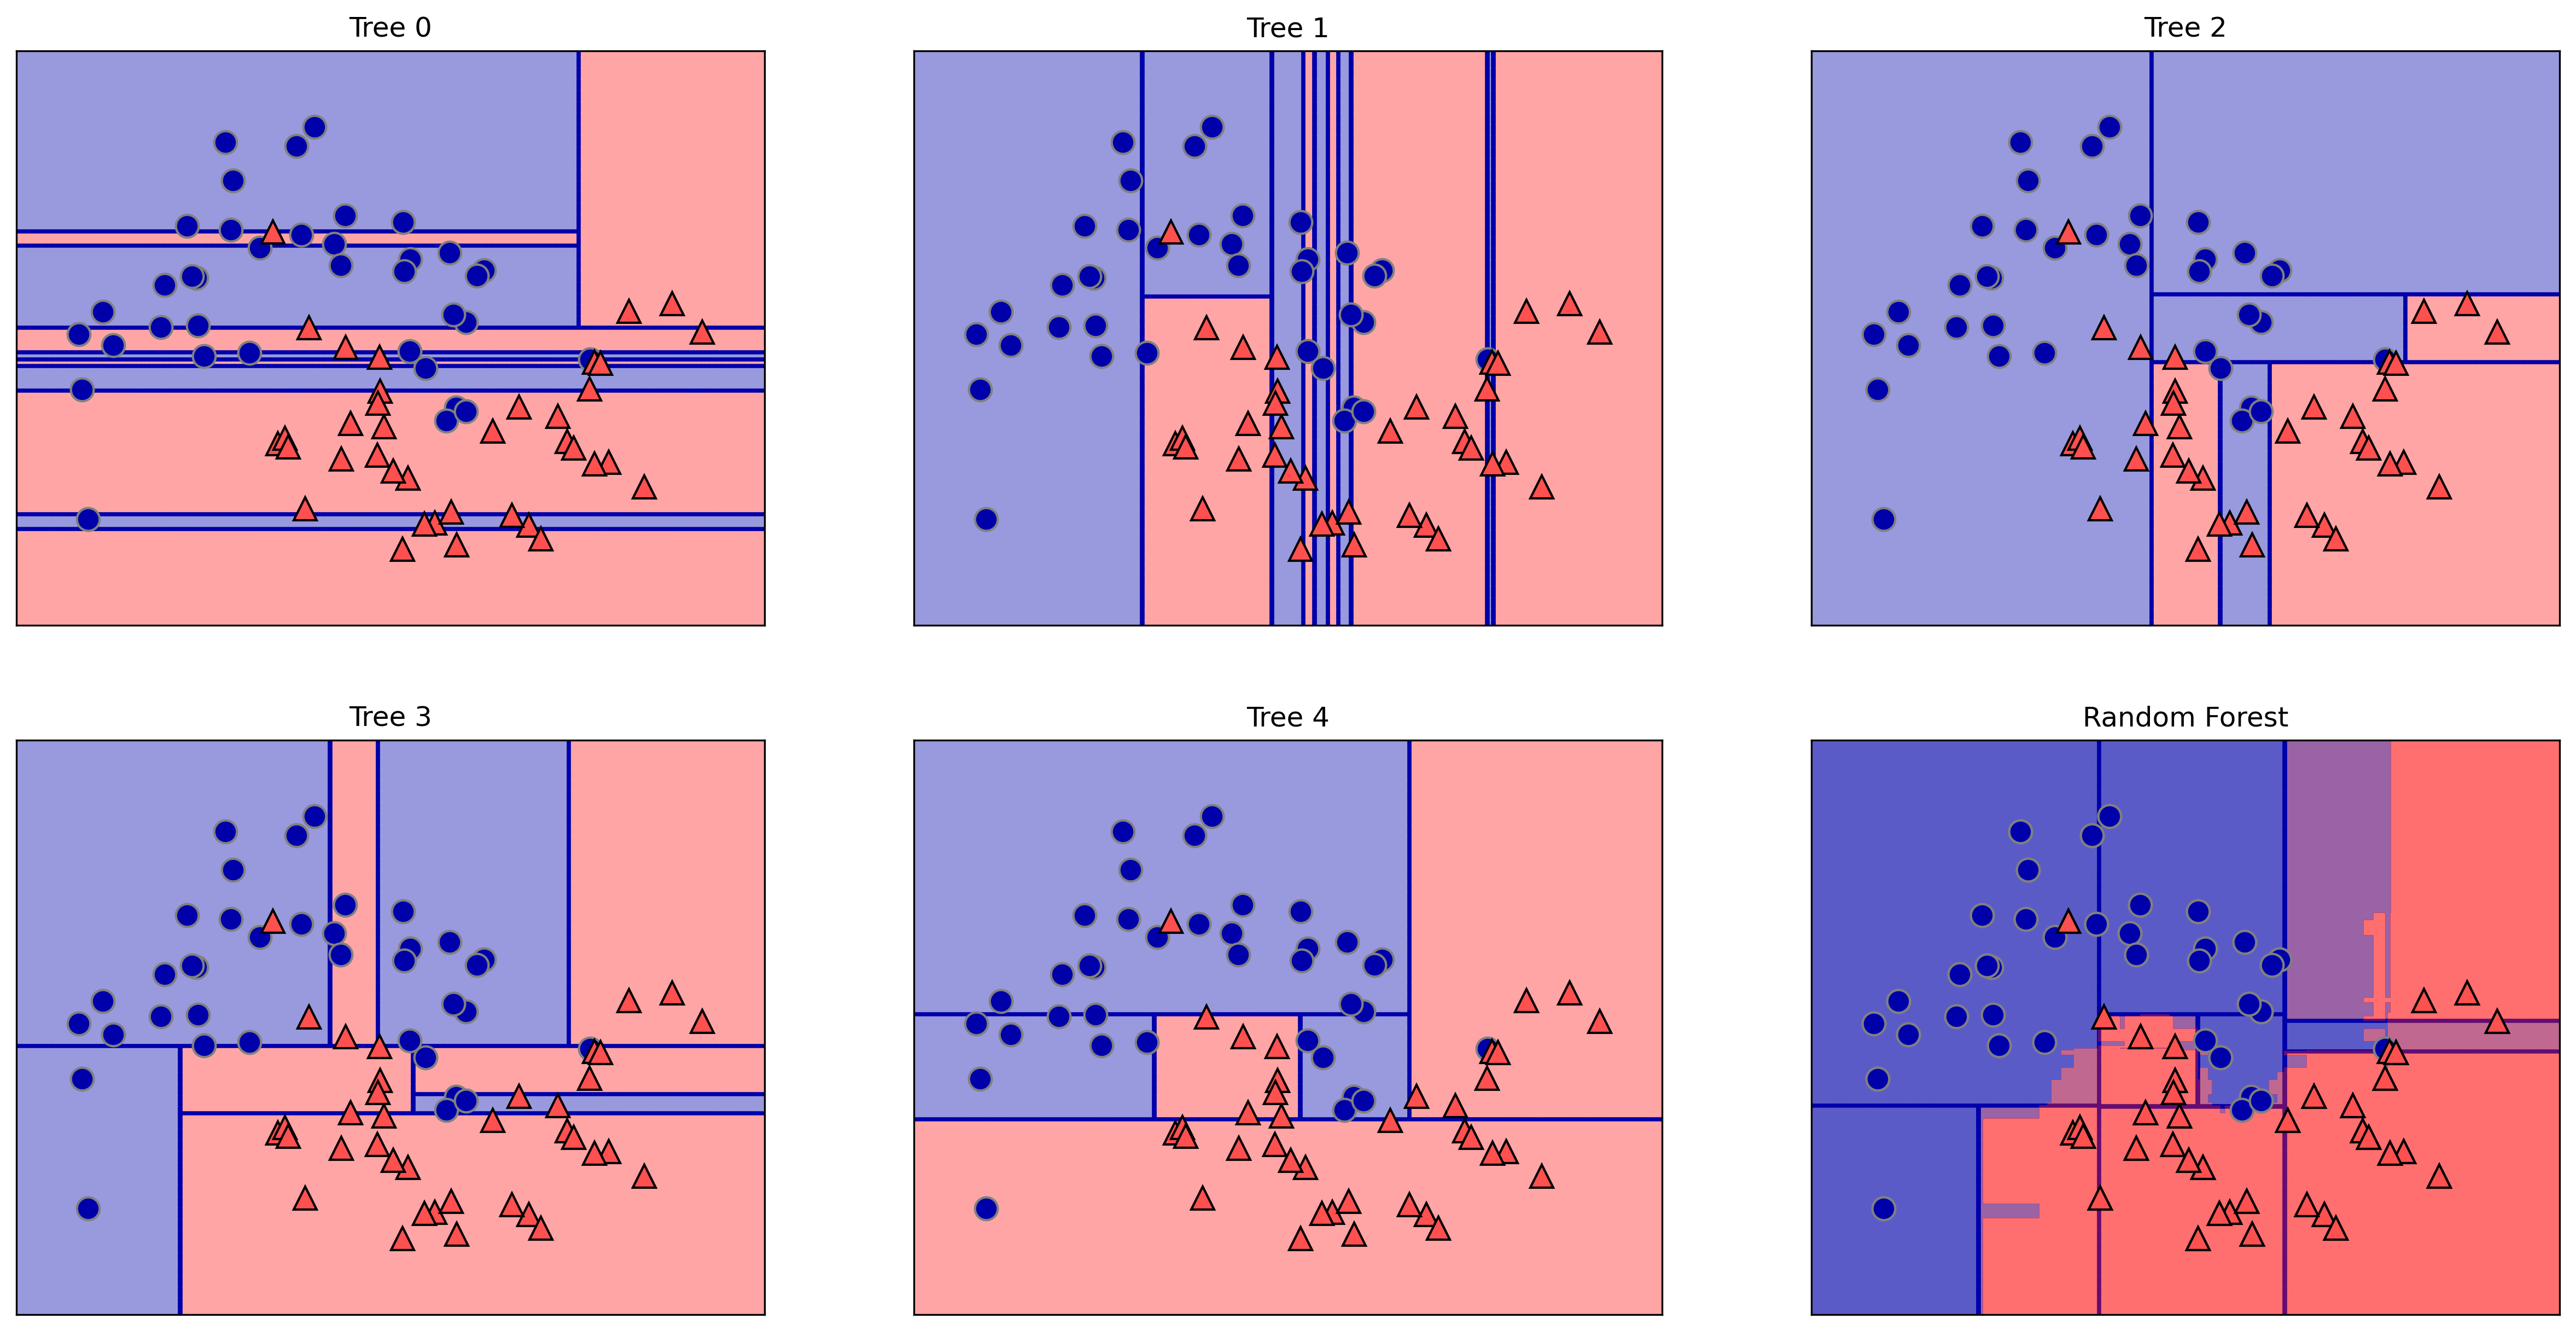

In [5]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)

mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()

This plots only the observations used to train each sub-tree

In [6]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))



Accuracy on training set: 1.000
Accuracy on test set: 0.972


In [7]:
yhat_test = forest.predict(X_test)
fp=sum(yhat_test*(1-y_test))
fn = sum((1-yhat_test)*y_test)
tp =  sum(yhat_test*y_test)
print("Number of false positives: {:.0f}".format(fp))
print("Number of false negatives: {:.0f}".format(fn))
y_test.shape


Number of false positives: 1
Number of false negatives: 3


(143,)

In [8]:
yhat_testalt = forest.predict_proba(X_test)[:,1]>=.25
fpalt=sum(yhat_testalt*(1-y_test))
fnalt = sum((1-yhat_testalt)*y_test)
print("Number of false positives (alt): {:.0f}".format(fpalt))
print("Number of false negatives (alt): {:.0f}".format(fnalt))

Number of false positives (alt): 6
Number of false negatives (alt): 0


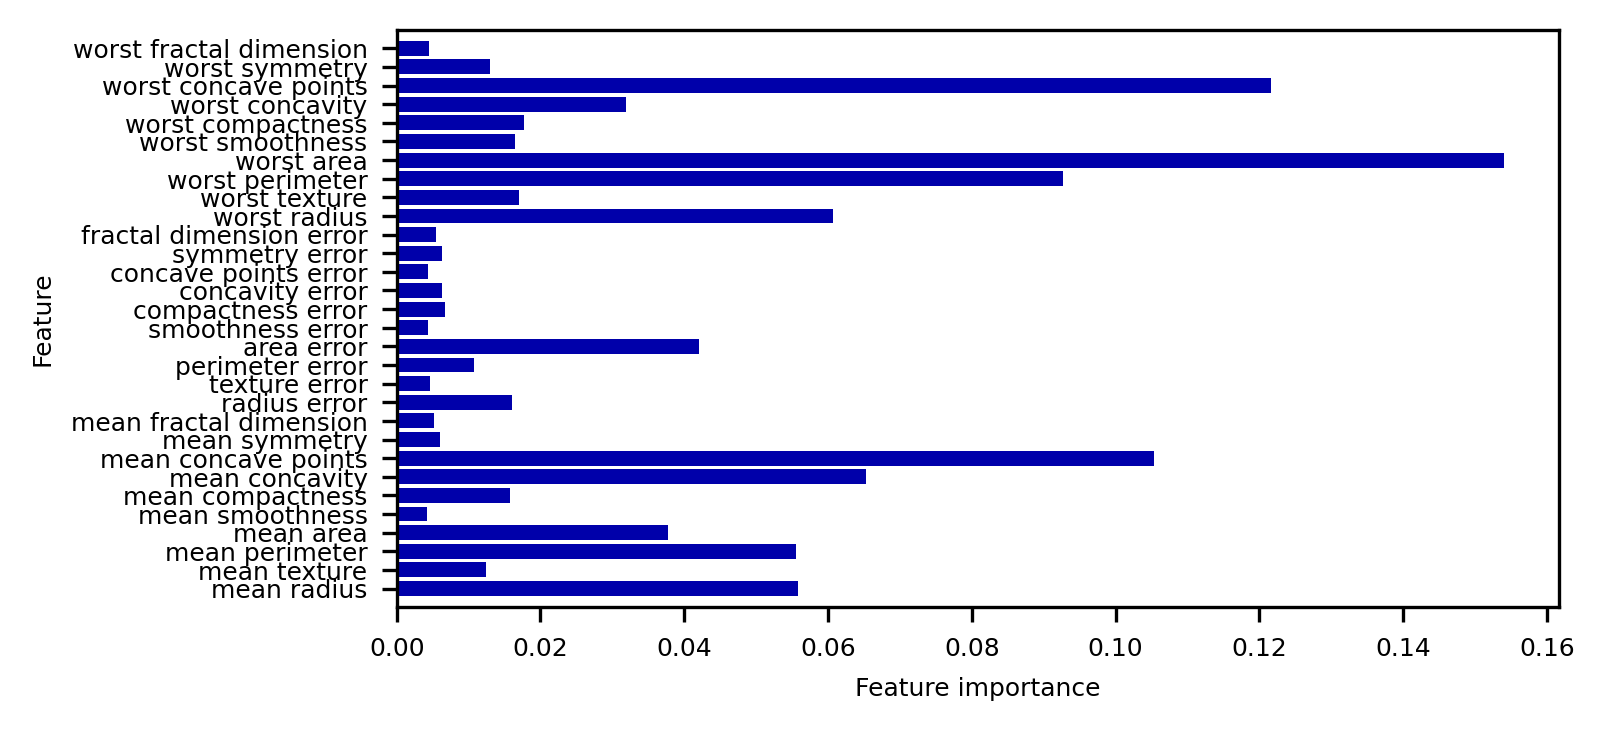

In [9]:
plt.rcParams["font.size"] = (6)

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)


plot_feature_importances_cancer(forest)

###### Strengths, weaknesses, and parameters

#### Gradient Boosted Regression Trees (Gradient Boosting Machines)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)


print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [11]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [12]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.2)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


Accuracy on training set: 0.995
Accuracy on test set: 0.986


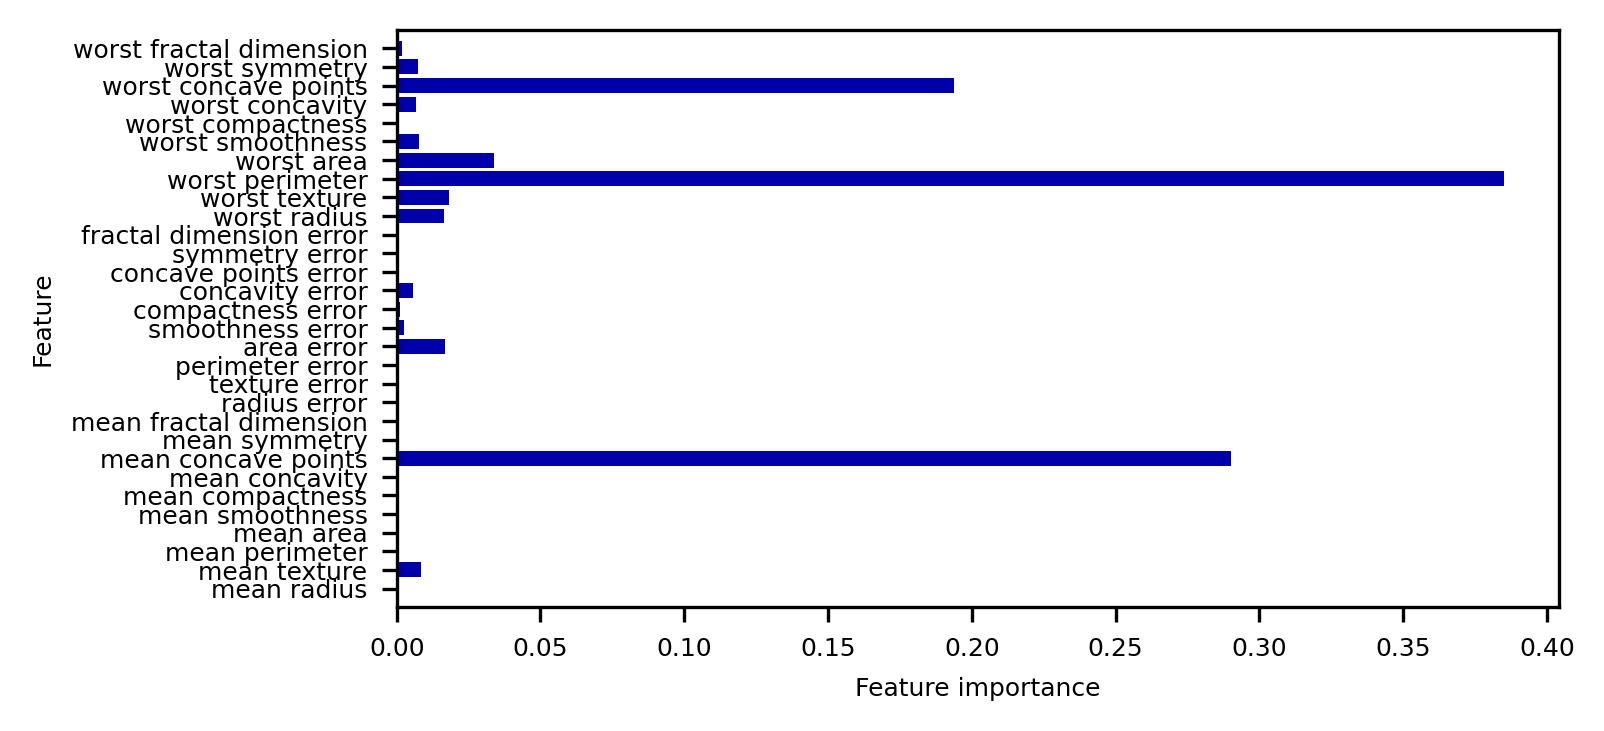

In [13]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1,learning_rate=.2)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))
plot_feature_importances_cancer(gbrt)

In [14]:
# Try grid search cross validation on the gradient boosted tree


In [15]:
# Try grid search on random forest



In [16]:
# display the out-of-sample accuracy from the CV-ed RF and GBRT

In [17]:
# display out-of-sample false negative rate and false positive rate from each CV-ed model


Try random forest or gradient boosted trees on the mortgage data from last time!